<a href="https://colab.research.google.com/github/mseyfi/DeepLearning/blob/master/multi_class_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Multi class Classification ANN (logestic Regression)

import numpy as np
import matplotlib.pyplot as plt
import cv2
%tensorflow_version 2.x
import tensorflow as tf

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.7811 - accuracy: 0.7633 - val_loss: 0.5329 - val_accuracy: 0.8395
Epoch 2/5
60000/60000 [==============================] - 7s 124us/sample - loss: 0.5043 - accuracy: 0.8421 - val_loss: 0.4618 - val_accuracy: 0.8586
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4304 - accuracy: 0.8640 - val_loss: 0.4129 - val_accuracy: 0.8736
Epoch 4/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3837 - accuracy: 0.8801 - val_loss: 0.4016 - val_accuracy: 0.8772
Epoch 5/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.3457 - accuracy: 0.8889 - val_loss: 0.3728 - val_accuracy: 0.8891
60000/1 [====================================================================================================================================================================================================

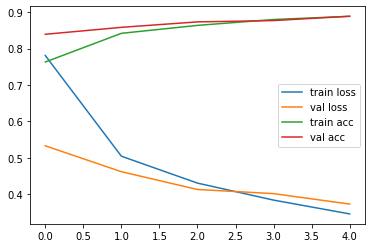

In [36]:
mnist = tf.keras.datasets.mnist

# load the mnist data
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

# normalize data 
X_train, X_test = X_train / 255.0, X_test / 255.0



# create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.LeakyReLU(alpha=.2))

model.add(tf.keras.layers.Dropout(.2))
model.add(tf.keras.layers.Dense(128, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# train the model
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 5)

# print the training results
print('Train loss {:.2f} acc {:.2f}'.format(model.evaluate(X_train, Y_train)[0], model.evaluate(X_train, Y_train)[1]))
print('Test: loss {:.2f} acc {:.2f}'.format(model.evaluate(X_test, Y_test)[0], model.evaluate(X_test, Y_test)[1]))

plt.plot(H.history['loss'], label='train loss')
plt.plot(H.history['val_loss'], label='val loss')


plt.plot(H.history['accuracy'], label='train acc')
plt.plot(H.history['val_accuracy'], label='val acc')
plt.legend()
 
